# Titanic Disaster Survival Prediction


The Titanic was a catastrophy in itself.  
We are provided with the dataset which contains various attributes of the passengers onboard such as Age, Gender, etc.  
  
We will be using a suitable model to predict survival probability of the passengers based on various attributes.  

## Sections:  
1. <a href=#Data-Wrangling>Data Wrangling Phase</a>
2. <a href=#Data-Exploration>Data Exploration Phase</a>

## Data Wrangling

The Dataset contains:  
  
1. *survival*: Depicts Survival of the passenger. 0 = No, 1 = Yes  
2. *pclass*: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd  
3. *sex*: Sex of the passenger. male or female  	
4. *Age*: Age in years.   	
5. *sibsp*: no. of siblings / spouses aboard the Titanic.  	
6. *parch*:	no. of parents / children aboard the Titanic.  	
7. *ticket*: Ticket number.  	
8. *fare*: Passenger fare.  	
9. *cabin*: Cabin number.  	
10. *embarked*: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton.  

In [95]:
#importing necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
import sklearn.ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [54]:
data = pd.read_csv("..\\Datasets\\train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [56]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Age

In [57]:
sorted(data['Age'].unique())

[0.83,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 0.42,
 0.67,
 0.75,
 0.92,
 1.0,
 6.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.5,
 20.5,
 23.5,
 24.5,
 30.5,
 32.5,
 34.5,
 36.0,
 36.5,
 37.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0]

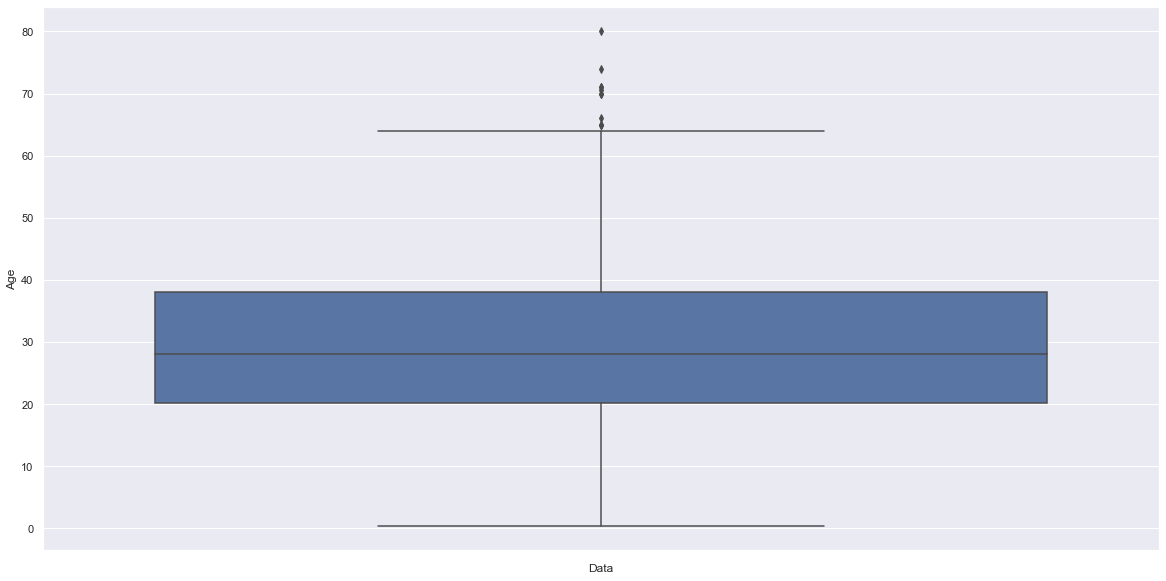

In [58]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", palette="muted")
sns.set(rc={'figure.figsize':(20.0,5.0)})
sns.set(color_codes=True)
ax = sns.boxplot(y=data['Age'])
plt.ylabel('Age')
plt.xlabel('Data')
plt.show()

First of all, the there are missing values in Age or NaN values.  
Also, there are values less than 1 for Age.  
We see that there are outliers in Age around 65 but an age around 80 is not that strange. 

It is given in dataset that Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

Correcting age. Replacing nan and >1 with mean.

In [59]:
data[data['Age'] < 1.0].count()

PassengerId    7
Survived       7
Pclass         7
Name           7
Sex            7
Age            7
SibSp          7
Parch          7
Ticket         7
Fare           7
Cabin          1
Embarked       7
dtype: int64

In [60]:
data[data['Age'].isnull()].count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

In [61]:
data[data['Age'] < 1.0] = np.NaN
data['Age']= data['Age'].fillna((data['Age'].median()))
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,884.000000,884.000000,884.000000,891.000000,884.000000,884.000000,884.000000
mean,445.128959,0.378959,2.308824,29.575758,0.519231,0.374434,32.164158
std,257.123194,0.485403,0.837060,12.768603,1.104235,0.804195,49.712115
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*PROBLEM* One problem I see is that all other columns now have reduced entries in comparison to Age column.  
Let's see other attributes too.  


In [62]:
nan_rows = data[data.isnull().T.any().T]
nan_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.0,0.0,0.0,330877,8.4583,NaN,Q
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885.0,0.0,3.0,"Sutehall, Mr. Henry Jr",male,25.0,0.0,0.0,SOTON/OQ 392076,7.0500,NaN,S
885,886.0,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.1250,NaN,Q
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.4500,NaN,S


A lot of cabins are not filled. Lets drop them.

In [63]:
data.drop('Cabin', axis=1, inplace=True)

In [64]:
nan_rows = data[data.isnull().T.any().T]
nan_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62.0,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,NaN
78,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
469,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
803,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
829,830.0,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,NaN
831,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN


### SibSp

In [65]:
sorted(data['SibSp'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 8.0]

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

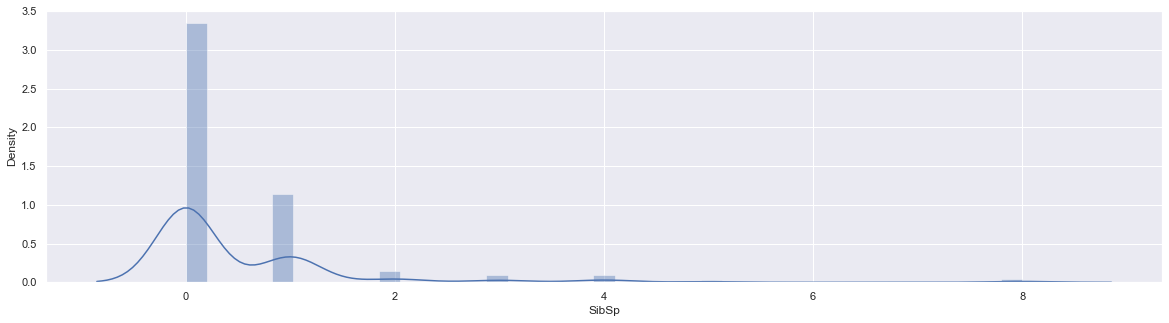

In [66]:
sns.distplot(data['SibSp'].dropna())

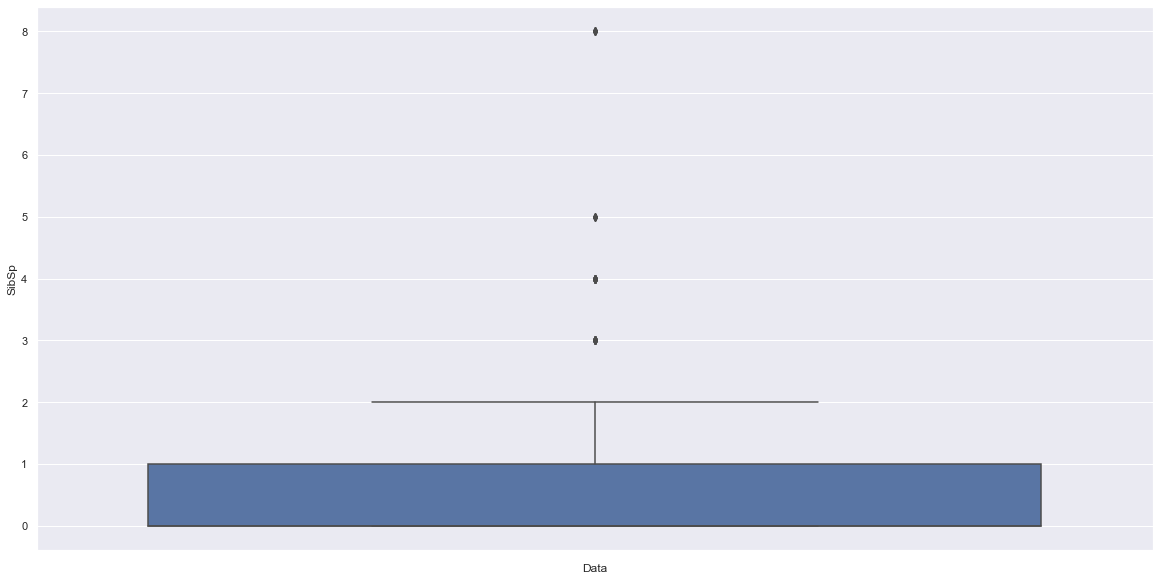

In [67]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y=data['SibSp'])
plt.ylabel('SibSp')
plt.xlabel('Data')
plt.show()

In [68]:
data['SibSp']= data['SibSp'].fillna((round(data['SibSp'].mean())))

### Parch

In [69]:
sorted(data['Parch'].unique())

[0.0, 1.0, 2.0, 5.0, nan, 3.0, 4.0, 6.0]

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

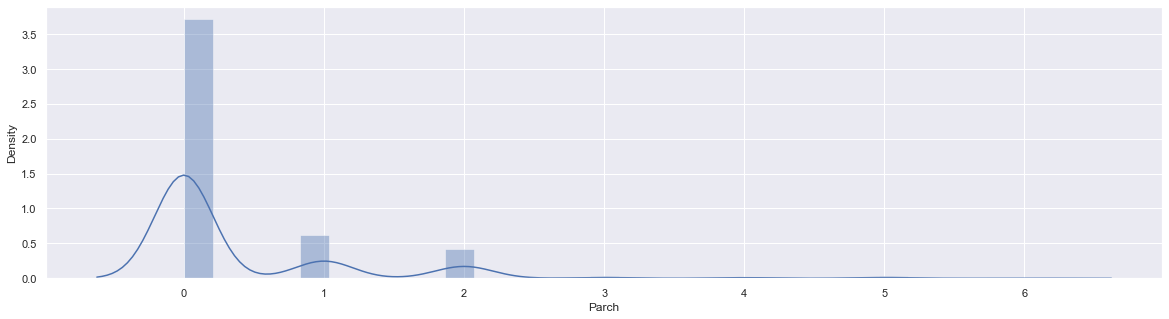

In [70]:
sns.distplot(data['Parch'].dropna())

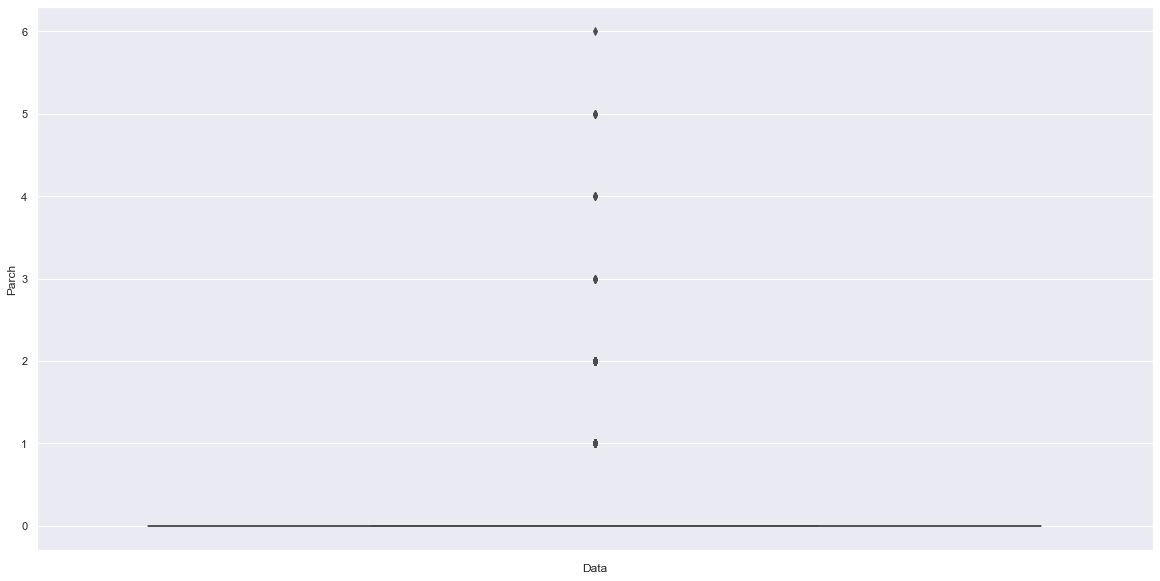

In [71]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y=data['Parch'])
plt.ylabel('Parch')
plt.xlabel('Data')
plt.show()

In [72]:
data['Parch']= data['Parch'].fillna((round(data['Parch'].mean())))

### Pclass

In [73]:
sorted(data['Pclass'].unique())

[1.0, 2.0, 3.0, nan]

In [74]:
data['Pclass']= data['Pclass'].fillna((round(data['Pclass'].mean())))

In [75]:
sorted(data['Pclass'].unique())

[1.0, 2.0, 3.0]

### Embarked

In [76]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [77]:
##U for Unknown
data['Embarked']= data['Embarked'].fillna('U')

In [78]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', 'U'], dtype=object)

### Gender

In [79]:
data['Sex'].unique()

array(['male', 'female', nan], dtype=object)

In [82]:
data.drop(columns=['Name','Ticket'], inplace=True) #drop de Cabin inutile
data = pd.get_dummies(data, dummy_na=True,drop_first=True)

KeyError: "['Name' 'Ticket'] not found in axis"

In [83]:
#data = pd.concat([data, df], axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_nan,Embarked_Q,Embarked_S,Embarked_U,Embarked_nan
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,0,1,0,0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0,0,0,0,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,0,1,0,0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,0,1,0,0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,0,1,0,0


In [84]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Sex_nan', 'Embarked_Q', 'Embarked_S', 'Embarked_U',
       'Embarked_nan'],
      dtype='object')

## Exploring Relationships among Attributes

In [85]:
#a function to create a probability from the data
def prob(factor):
    df = pd.crosstab(index=data[factor], columns=data['Survived']).reset_index()
    df['probSurvived'] = df[1] / (df[1] + df[0])
    return( df[[factor, 'probSurvived']])

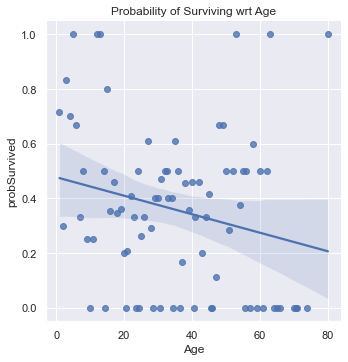

In [86]:
sns.lmplot(data = prob('Age'), x = 'Age', y = 'probSurvived', fit_reg = True)
plt.title('Probability of Surviving wrt Age')
plt.show()

In [87]:
print(scipy.stats.pearsonr(prob('Age')['Age'], prob('Age')['probSurvived']))

(-0.2308601928929891, 0.0357469648636963)


According to http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/ :
A very weak downward relationship. > 0.5 or < -0.5 is high information gain...

According to http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/ :
This relationship is statistically significant, thus useful.

This means that as Age increases, Survival Probability decreases.

In [88]:
def category(factor):
    rows = []
    for item in data[factor].unique():
        row = {'Condition': factor}
        total = len(data[data[factor] == item])
        n = len(data[(data[factor] == item) & (data['Survived'] == 1)])
        prob = n / total
        row.update({'Level': item, 'Probability': prob})
        rows.append(row)
    return pd.DataFrame(rows)

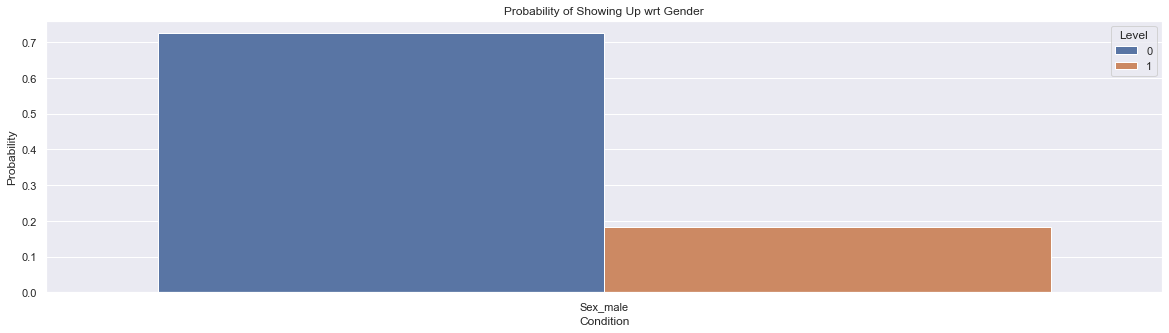

In [89]:
sns.barplot(data = category('Sex_male'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Gender')
plt.show()

Here, 0 denotes Females and 1 denotes Male.  
This means that Females have a High Survival Probability.

## Prepare dataset for Machine Learning processing

In [90]:
data.set_index('PassengerId', inplace=True)

In [91]:
data.dropna(inplace=True)
X = data.iloc[:, 1:len(data.columns)].values
y = data.iloc[:, 0].values


In [92]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape )
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (592, 11)
Training Labels Shape: (592,)
Testing Features Shape: (292, 11)
Testing Labels Shape: (292,)


## Fit model(s)

In [93]:


select = sklearn.feature_selection.SelectKBest(k='all')



names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","LogisticRegression", "SGDClassifier"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators = 330, criterion='entropy',verbose=100, n_jobs=4,max_depth=60),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(), 
    SGDClassifier(max_iter=1000)]

estimator = 7

steps = [('feature_selection', select),
        (names[estimator],classifiers[estimator])]

pipeline = sklearn.pipeline.Pipeline(steps)



### fit your pipeline on X_train and y_train
pipeline.fit( X_train, y_train )
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )

F:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
F:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [96]:
parametres = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
              'n_estimators': list(range(100,500,100))}
model = GridSearchCV(RandomForestClassifier(), param_grid=parametres)
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

## Evaluate results

In [94]:
### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       180
         1.0       0.70      0.75      0.72       112

    accuracy                           0.78       292
   macro avg       0.77      0.78      0.77       292
weighted avg       0.78      0.78      0.78       292



In [98]:
y_pred_bis = model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred_bis))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       180
         1.0       0.75      0.68      0.71       112

    accuracy                           0.79       292
   macro avg       0.78      0.77      0.77       292
weighted avg       0.79      0.79      0.79       292

